In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
np

<module 'numpy' from '/home/codespace/.local/lib/python3.12/site-packages/numpy/__init__.py'>

In [5]:
pd

<module 'pandas' from '/home/codespace/.local/lib/python3.12/site-packages/pandas/__init__.py'>

In [6]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [12]:
!wget $data

--2025-09-27 03:44:17--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.04s   

2025-09-27 03:44:17 (21.8 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [11]:
# Importing data
df = pd.read_csv('car_fuel_efficiency.csv')

In [12]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [13]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [14]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

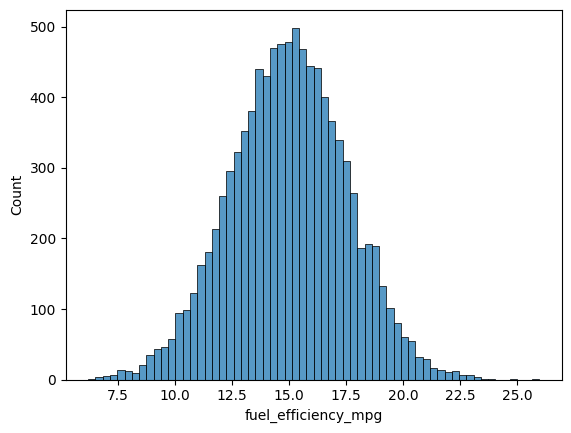

In [15]:
sns.histplot(df.fuel_efficiency_mpg)

<h3>In visualization it look like it doesn't have a long tail</h3>

In [16]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

<h3>The horsepower column has null data</h3>

In [17]:
df.horsepower.median()

np.float64(149.0)

In [18]:
n = len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - (n_val+n_test)
n,n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [19]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<p>At this point we made random numbers for index with numpy with seed '42'
And split the Dataframe to parts those we wanted with those random indexes
And reseting the index for each part for easy access</p>

In [22]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [23]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

<p>Making the 'y' arrays and remove the answer from the Dataframe</p>

In [24]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [62]:
df_train_zeros = df_train
df_train_means = df_train

<h5>Linear regression without regularization</h5>

In [30]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTX.dot(XTX_inv)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

<p>All our data types are number so we don't need to write prepare 'X' function and we could just make the 'X' matrix directly from the Dataframe</p>

In [78]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

<p>Making two Dataframe those in one nulls filled with zeros and in one nulls filled with mean</p>

<h5>RMSE part</h5>

In [76]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

<h4>Calculating the RMSE of two different Dataframes</h4>

In [90]:
X_train_zeros = df_train_zeros[base].fillna(0).values
X_val_zeros = df_val[base].fillna(0).values
w0,w = train_linear_regression(X_train_zeros,y_train)
y_pred = w0 + X_val_zeros.dot(w)
rmse(y_val,y_pred).round(2)

np.float64(0.04)

<p>The RMSE of Dataframe that nulls filled with zeros</p>

In [91]:
X_train_means = df_train_means[base].fillna(df_train['horsepower'].mean().round(1)).values
X_val_means = df_val[base].fillna(df_train['horsepower'].mean().round(1)).values
w0,w = train_linear_regression(X_train_means,y_train)
y_pred = w0 + X_val_means.dot(w)
rmse(y_val,y_pred).round(2)

np.float64(0.04)

<p>The RMSE of Dataframe that nulls filled with mean number</p>